In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### jpg 이미지 하나 다운스케일, 정규화, 흑백 반전 후 확인해보기

(480, 640, 3)
(416, 416, 3)


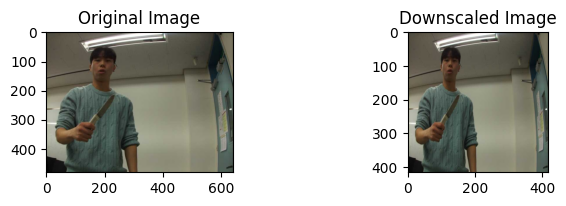

In [2]:
# 원본 손글씨 test 이미지 
original_image_path = "selfmade_dataset/original/1.jpg"
original_image = Image.open(original_image_path)
original_image_array = np.array(original_image)
print(original_image_array.shape)

# 이미지 다운스케일
downscaled_image = original_image.resize((416,416))
downscaled_image_array = np.array(downscaled_image).astype(np.int16)
print(downscaled_image_array.shape)
# print(downscaled_image_array)

# 이미지 정규화 (a~b) -> (0~255)
# normalized_image_array = (np.round((downscaled_image_array - np.min(downscaled_image_array)) * 255 / (255 - np.min(downscaled_image_array)))).astype(np.int16)
# print(normalized_image_array)

# 흑백 반전
# reversed_image_array = 255 - normalized_image_array
# print(reversed_image_array)

# 이미지 표시
plt.figure(figsize=(8, 4))

plt.subplot(2, 2, 1)
plt.imshow(original_image_array, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(downscaled_image_array, cmap='gray')
plt.title("Downscaled Image")

# plt.subplot(2, 2, 3)
# plt.imshow(normalized_image_array, cmap='gray')
# plt.title("Normalized Image")
# 
# plt.subplot(2, 2, 4)
# plt.imshow(reversed_image_array, cmap='gray')
# plt.title("Reversed Image")

plt.show()

### selfmade_dataset/original 폴더 내의 이미지들 다운스케일 후 selfmade_dataset/downscaled 폴더에 저장

In [3]:
import os

for file in os.listdir("selfmade_dataset/original/"):
    original_image_path = "selfmade_dataset/original/"+file
    original_image = Image.open(original_image_path)
    # 이미지 다운스케일
    downscaled_image = original_image.resize((416,416))
    # downscaled_image_array = np.array(downscaled_image).astype(np.int16)
    # 이미지 정규화
    # normalized_image_array = (np.round((downscaled_image_array - np.min(downscaled_image_array)) * 255 / (255 - np.min(downscaled_image_array)))).astype(np.int16)
    # 흑백 반전
    # reversed_image_array = 255 - normalized_image_array
    # image_list = reversed_image_array.reshape(16*16).tolist()
    downscaled_image.save("selfmade_dataset/downscaled/"+file)

### 회전, 반전 후 저장

In [3]:
import os

for file in os.listdir("selfmade_dataset/downscaled/"):
    original_image_path = "selfmade_dataset/downscaled/"+file
    original_image = Image.open(original_image_path)
    # 회전
    rotated_image_90 = original_image.rotate(90)
    rotated_image_180 = original_image.rotate(180)
    rotated_image_270 = original_image.rotate(270)
    # 좌우
    flipped_image_1 = original_image.transpose(Image.FLIP_LEFT_RIGHT)
    # 상하
    flipped_image_2 = original_image.transpose(Image.FLIP_TOP_BOTTOM)

    rotated_image_90.save("selfmade_dataset/downscaled/90"+file)
    rotated_image_180.save("selfmade_dataset/downscaled/270"+file)
    rotated_image_270.save("selfmade_dataset/downscaled/180"+file)
    flipped_image_1.save("selfmade_dataset/downscaled/lr"+file)
    flipped_image_2.save("selfmade_dataset/downscaled/tb"+file)

### Shuffle

In [24]:
import os
i = 0
for file in os.listdir("selfmade_dataset/need_to_shuffle/"):
    if file[-3:] == 'jpg':
        original_jpg_path = "selfmade_dataset/need_to_shuffle/"+file
        original_txt_path = "selfmade_dataset/need_to_shuffle/"+file[:-3]+"txt"
        destination_jpg_path = "selfmade_dataset/"+str(i)+"/"+file
        destination_txt_path = "selfmade_dataset/"+str(i)+"/"+file[:-3]+"txt"
        os.rename(original_jpg_path, destination_jpg_path)
        os.rename(original_txt_path, destination_txt_path)
        i = (i+1) % 10
    